 
Федеральное государственное автономное образовательное
 учреждение высшего образования 
«Национальный исследовательский университет ИТМО»


Факультет технологий искусственного интеллекта


Статистика и анализ данных
`Лабораторная работа №2`


Студент: `Вдовин Герман Евгеньевич `

Группа: `J3113`

Учебная группа: `2.1`

ISU: `408366`

Преподаватель: `Свинцов Михаил Викторович`


### Ход работы

1. Расчитал основные описательные статистики

2. Построил графики

3. Исследовал устойчивость характеристик

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [43]:
N = 1000

# дискретное/непрерывное распределение
discrete_sample = np.random.poisson(lam=.5, size=N)
continuous_sample = np.random.exponential(scale=1, size=N)

### Считаем основные описательные статистики

In [79]:
def descriptive_statistics(data: np.ndarray) -> dict[str, float]: 
    mean = np.mean(data)
    stats_dict = {
        "q1" : np.quantile(data, .25),
        "q2": np.quantile(data, .5),
        "q3": np.quantile(data, .75),
        "mean": mean,
        "mode": stats.mode(data, keepdims=False).mode.item(),
        "rng": np.ptp(data),
        "iqe": stats.iqr(data),
        "variance": np.var(data, ddof=1),
        "std_dev": np.std(data, ddof=1),
        "variation_coef": np.std(data) / mean if mean != 0 else np.nan,
        "median_abs_dev": stats.median_abs_deviation(data),
        "skewness": stats.skew(data),
        "kurtosis": stats.kurtosis(data, fisher=True),
    }

    for k in range(1, 6):
        stats_dict[f"moment_{k}"] = np.mean(data**k)
        stats_dict[f"central_moment_{k}"] = np.mean((data - mean)**k)
    return pd.Series(stats_dict).round(4)

discrete_stats = descriptive_statistics(discrete_sample)
continuous_stats = descriptive_statistics(continuous_sample)

pd.DataFrame({"Poisson": discrete_stats, "Exponential": continuous_stats})

,Poisson,Exponential
q1,0.0000,0.3250
q2,0.0000,0.7141
q3,1.0000,1.3571
mean,0.5080,1.0252
mode,0.0000,0.0008
rng,4.0000,9.4357
iqe,1.0000,1.0321
variance,0.5245,1.0810
std_dev,0.7242,1.0397
variation_coef,1.4249,1.0137


### Строим графики

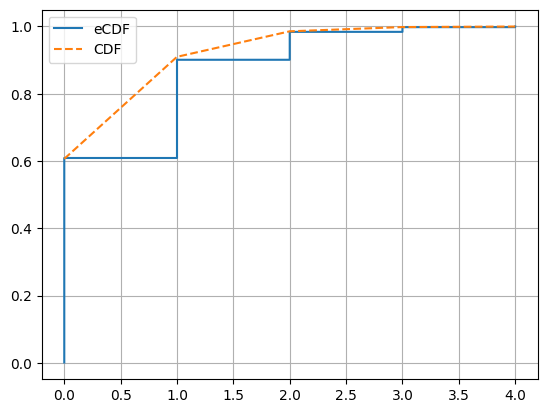

In [92]:
plt.step(
    s := np.sort(discrete_sample),
    np.arange(1, len(s) + 1) / len(s),
    where="post",
    label="eCDF",
)
plt.plot(x := np.arange(0, max(s) + 1), stats.poisson.cdf(x, 0.5), "--", label="CDF")
plt.legend()
plt.grid(True)
plt.show()

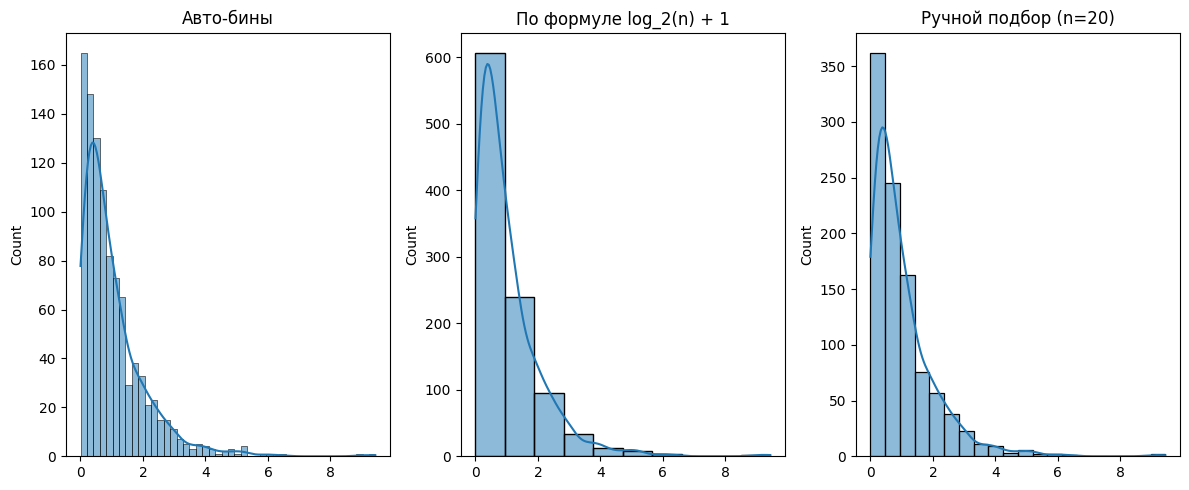

In [104]:
# эмперическая плотность распределения ePDF для непрерывного распределениея с наложением на теоретическую PDF
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
for ax, bins, title in zip(axs, 
                           ['auto',  int(np.log2(N)) + 1, 20],
                           # итого 3 графика:
                           ['Авто-бины', 'По формуле log_2(n) + 1', 'Ручной подбор (n=20)']):
    #                                      /}kernel density estimate
    sns.histplot(continuous_sample, bins=bins, kde=True, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

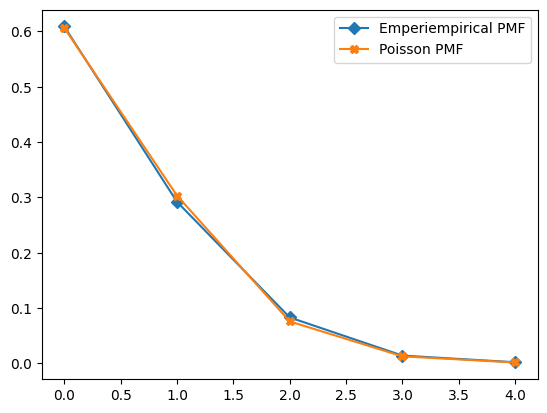

In [ ]:
# эмперическая ф-ия вероятности с наложением на теор
values, counts = np.unique(discrete_sample, return_counts=True)
plt.plot(values, counts / N, label="Emperiempirical PMF", marker='D')
plt.plot(values, stats.poisson.pmf(values, mu=0.5), label="Poisson PMF", marker='X')
plt.legend()
plt.grid(True)
plt.show()

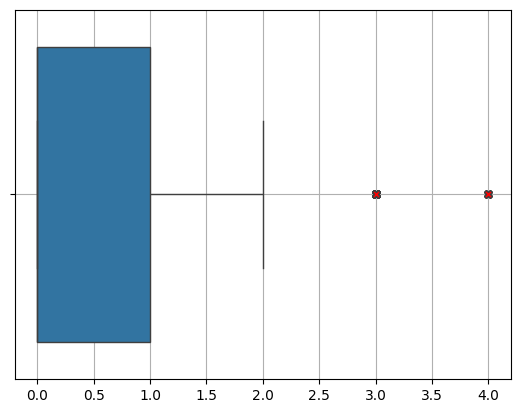

In [119]:
# боксплот
sns.boxplot(x=discrete_sample, flierprops={'markerfacecolor': 'RED', 'marker': 'X'})
plt.grid(True)
plt.show()

### Исследование устойчивости характеристик

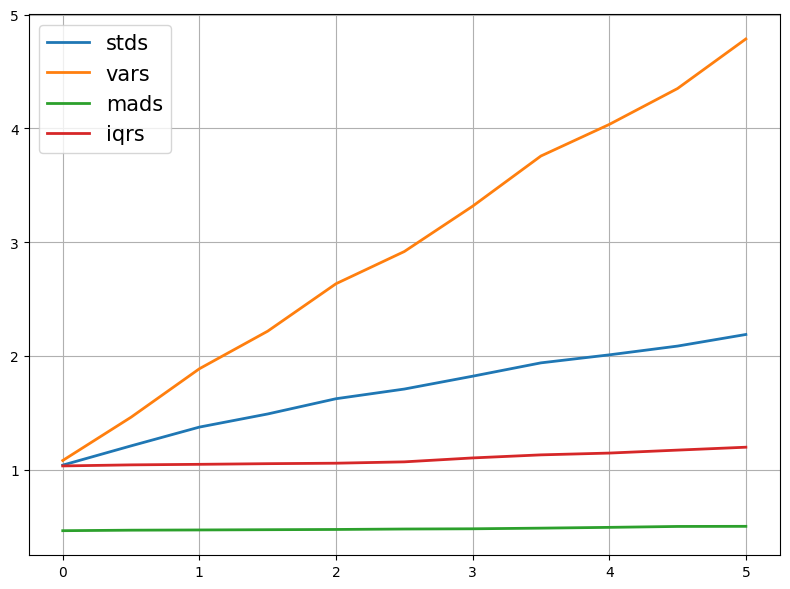

In [93]:
outlier_levels = np.linspace(0, 0.05, 11)
metrics = { "stds": [], "vars": [], "mads": [], "iqrs": [] }

for level in outlier_levels:
    k = int(N * level)
    if k > 0:
        outliers = np.random.normal(loc=10, scale=0.5, size=k)
        sample = np.concatenate([continuous_sample, outliers])
    else:
        sample = continuous_sample.copy()

    metrics["stds"].append(np.std(sample))
    metrics["vars"].append(np.var(sample))
    metrics["mads"].append(stats.median_abs_deviation(sample))
    metrics["iqrs"].append(stats.iqr(sample))

plt.figure(figsize=(8, 6))
for (label, values) in metrics.items():
    plt.plot(outlier_levels * 100, values, linewidth=2, label=label)

plt.legend(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()